# Installing Ultralytics

In [92]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


# Importing Essential Libraries

In [86]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import torch
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')


## Dispalying 9 Sample Images from the trainset

Number of images in the directory: 3530
Number of samples to display: 9


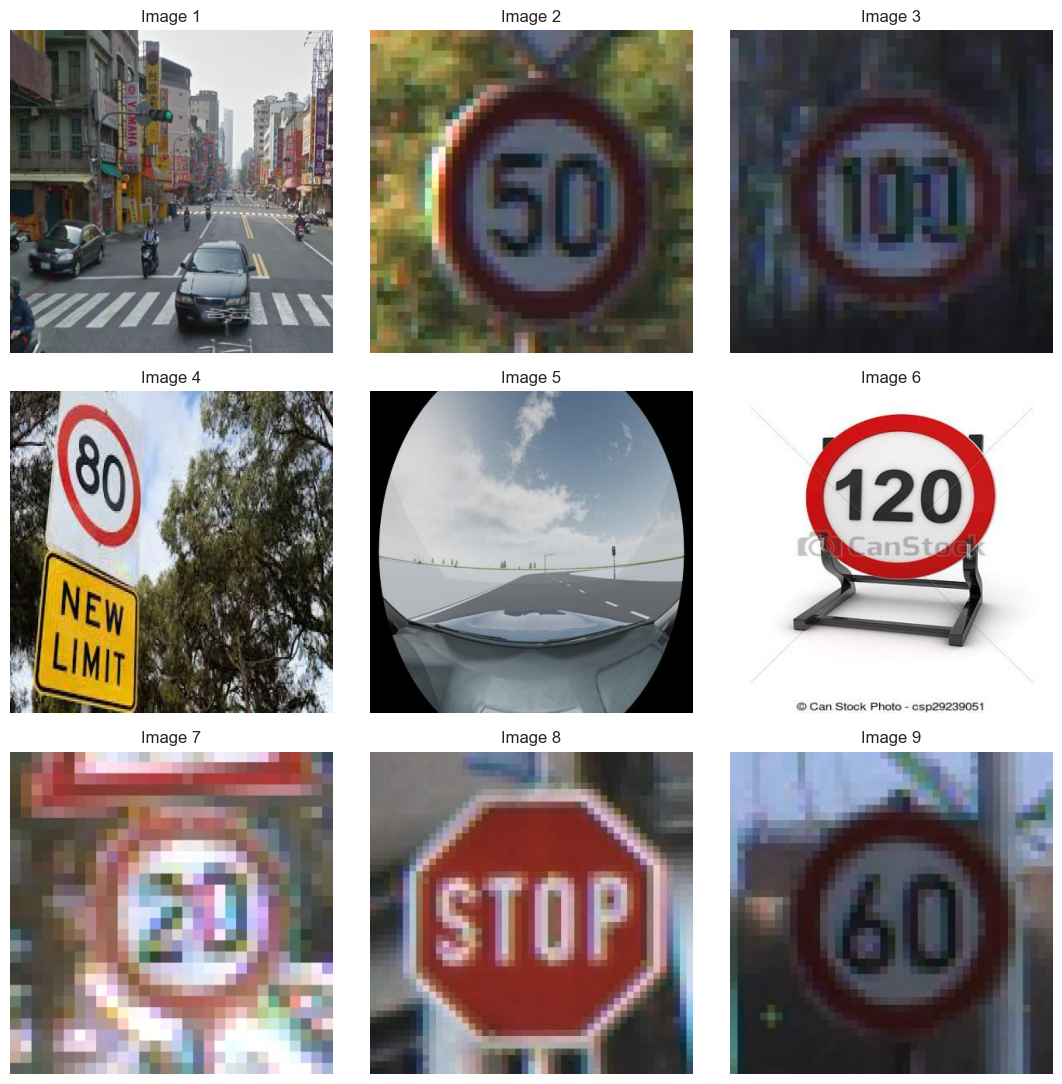

In [99]:
import os
import random
import matplotlib.pyplot as plt

def display_random_images(image_files, num_samples=9):
    # Randomly select num_samples images
    selected_images = random.sample(image_files, num_samples)

    # Create a 3x3 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(11, 11))

    # Loop through num_samples and display images
    for i, image in enumerate(selected_images):
        img_path = os.path.join(images_folder, image)
        ax = axes[i // 3, i % 3]  
        ax.imshow(plt.imread(img_path)) 
        ax.set_title(f'Image {i+1}')  
        ax.axis('off')  

    plt.tight_layout()  
    plt.show()  

if __name__ == "__main__":
    images_folder = '/Users/nivasreddy/Desktop/Final project/archive /train/images'

    # List all image files in the directory
    image_files = os.listdir(images_folder)

    print("Number of images in the directory:", len(image_files))
    print("Number of samples to display:", 9)

    display_random_images(image_files)


### Getting the shape of an Random Image from traindataset

Image Path: /Users/nivasreddy/Desktop/Final project/archive /train/images/road703_png.rf.0140915a317a8a89d807e36a87ae626e.jpg
Image Dimensions: 416 x 416
Number of Channels: 3


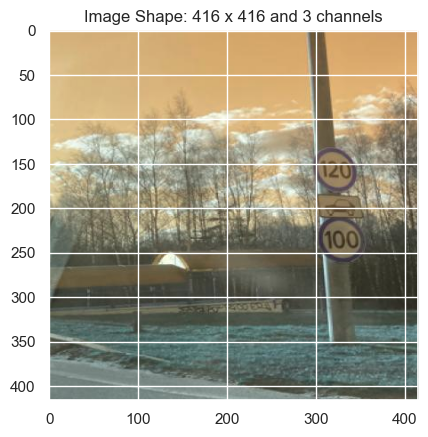

In [88]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def display_image_information(image_path):
    # Read the selected image
    image = cv2.imread(image_path)

    if image is not None:
        # Get image dimensions and channels
        height, width, channels = image.shape
        print(f"Image Path: {image_path}")
        print(f"Image Dimensions: {width} x {height}")
        print(f"Number of Channels: {channels}")

        # Display the image
        plt.imshow(image)
        plt.title(f"Image Shape: {width} x {height} and {channels} channels")
        plt.show()
    else:
        print("Failed to read the image file.")

if __name__ == "__main__":
    # Directory path containing images
    image_directory = '/Users/nivasreddy/Desktop/Final project/archive /train/images'

    # List all image files in the directory
    image_files = os.listdir(image_directory)

    # Randomly select an image file
    random_image_file = random.choice(image_files)

    # Image path of the selected image
    image_path = os.path.join(image_directory, random_image_file)

    display_image_information(image_path)


## Installing YOLOV8 model

In [6]:
pip install yolov8

Note: you may need to restart the kernel to use updated packages.


## Using YOLOV8 and trying to detect objects 

100%|██████████| 6.23M/6.23M [00:00<00:00, 34.5MB/s]



image 1/1 /Users/nivasreddy/Desktop/Final project/archive /train/images/road474_png.rf.b23168e8a435f81b0fb3ae4dc6a7dea9.jpg: 416x416 1 car, 52.9ms
Speed: 1.4ms preprocess, 52.9ms inference, 519.0ms postprocess per image at shape (1, 3, 416, 416)


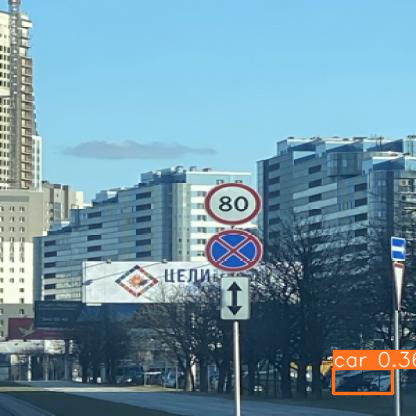

In [7]:
model = YOLO("yolov8n.pt")
image_directory = '/Users/nivasreddy/Desktop/Final project/archive /train/images'
image_files = os.listdir(image_directory)
random_image_file = random.choice(image_files)
image_path = os.path.join(image_directory, random_image_file)
result = model.predict(source=image_path, imgsz=(416))
plot = result[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


## MODEL TRAINING

In [8]:
# Load the YOLO model
fin_mdl = YOLO('yolov8.yaml').load('yolov8n.pt')
data_path = '/Users/nivasreddy/Desktop/Final project/archive /data.yaml'
epochs = 10  
img_size = 416  
batch_size = 64  
learning_rate = 0.0005  
dropout = 0.2  
device = 'cpu' 
final_result = fin_mdl.train(data=data_path, epochs=epochs, imgsz=img_size,
                               batch=batch_size, lr0=learning_rate, dropout=dropout, device=device)



WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.2.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.5 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8.yaml, data=/Users/nivasreddy/Desktop/Final project/archive /data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vi

train: Scanning /Users/nivasreddy/Desktop/Final project/archive /train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<00:00, 3944.30it/s]


train: New cache created: /Users/nivasreddy/Desktop/Final project/archive /train/labels.cache


val: Scanning /Users/nivasreddy/Desktop/Final project/archive /valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 3575.17it/s]

val: New cache created: /Users/nivasreddy/Desktop/Final project/archive /valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7981      3.577      1.058         16        416: 100%|██████████| 56/56 [12:11<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.26s/it]

                   all        801        944     0.0409      0.775      0.189      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      0.688      2.475      0.951         12        416: 100%|██████████| 56/56 [12:15<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:51<00:00,  7.31s/it]

                   all        801        944      0.299      0.403      0.337      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.6823       2.04     0.9463         11        416: 100%|██████████| 56/56 [12:47<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.49s/it]

                   all        801        944      0.558      0.478      0.509      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.6602      1.625     0.9348         10        416: 100%|██████████| 56/56 [12:35<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:51<00:00,  7.32s/it]

                   all        801        944      0.559      0.641       0.64      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.6273      1.324     0.9179         11        416: 100%|██████████| 56/56 [12:05<00:00, 12.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:51<00:00,  7.30s/it]

                   all        801        944      0.778      0.657      0.769      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.6057      1.128     0.9016         10        416: 100%|██████████| 56/56 [12:05<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.28s/it]

                   all        801        944      0.818      0.719        0.8      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.5888     0.9809     0.8962         14        416: 100%|██████████| 56/56 [12:19<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.27s/it]

                   all        801        944      0.867      0.753      0.848      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.5643     0.8717     0.8875         12        416: 100%|██████████| 56/56 [11:59<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.25s/it]

                   all        801        944      0.857      0.774      0.852      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.5473     0.7914     0.8801         12        416: 100%|██████████| 56/56 [12:20<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.26s/it]

                   all        801        944      0.898      0.811      0.878      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      0.521     0.7355     0.8743         12        416: 100%|██████████| 56/56 [12:03<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:51<00:00,  7.30s/it]

                   all        801        944      0.912       0.81      0.883      0.771



10 epochs completed in 2.191 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.5 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M1)
YOLOv8 summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:47<00:00,  6.76s/it]


                   all        801        944      0.912      0.811      0.883      0.772
           Green Light        801        122      0.886       0.51      0.672      0.395
             Red Light        801        108      0.729      0.602       0.63      0.383
       Speed Limit 100        801         52      0.928      0.923      0.935      0.868
       Speed Limit 110        801         17      0.826      0.837      0.921      0.857
       Speed Limit 120        801         60      0.929      0.876      0.971      0.896
        Speed Limit 20        801         56      0.985      0.893      0.963      0.825
        Speed Limit 30        801         74      0.922      0.946      0.962      0.901
        Speed Limit 40        801         55      0.933      0.909      0.944      0.826
        Speed Limit 50        801         71          1      0.737      0.894      0.806
        Speed Limit 60        801         76      0.995      0.829       0.91      0.838
        Speed Limit 7

## DISPLAYING PRECESION CURVE,RECALL CURVE AND CONFUSION MATRIX

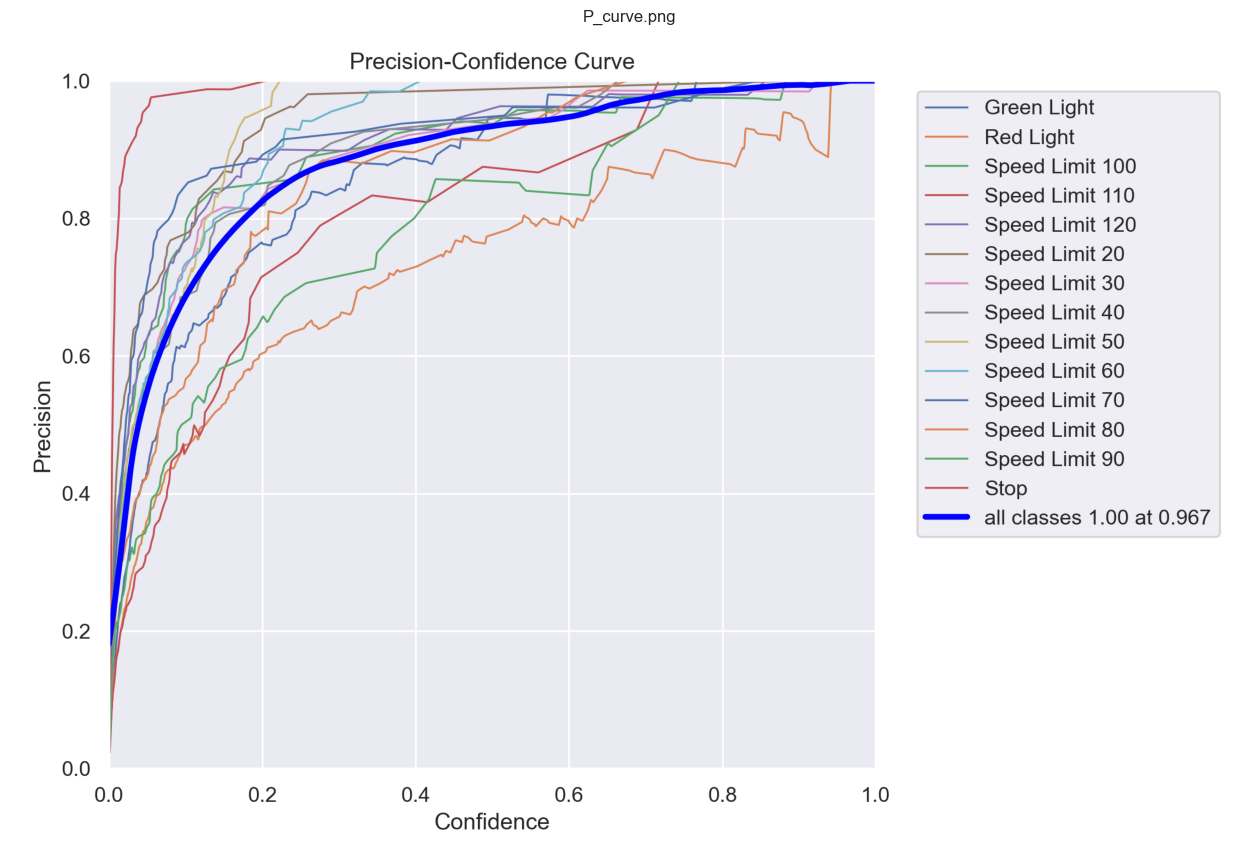

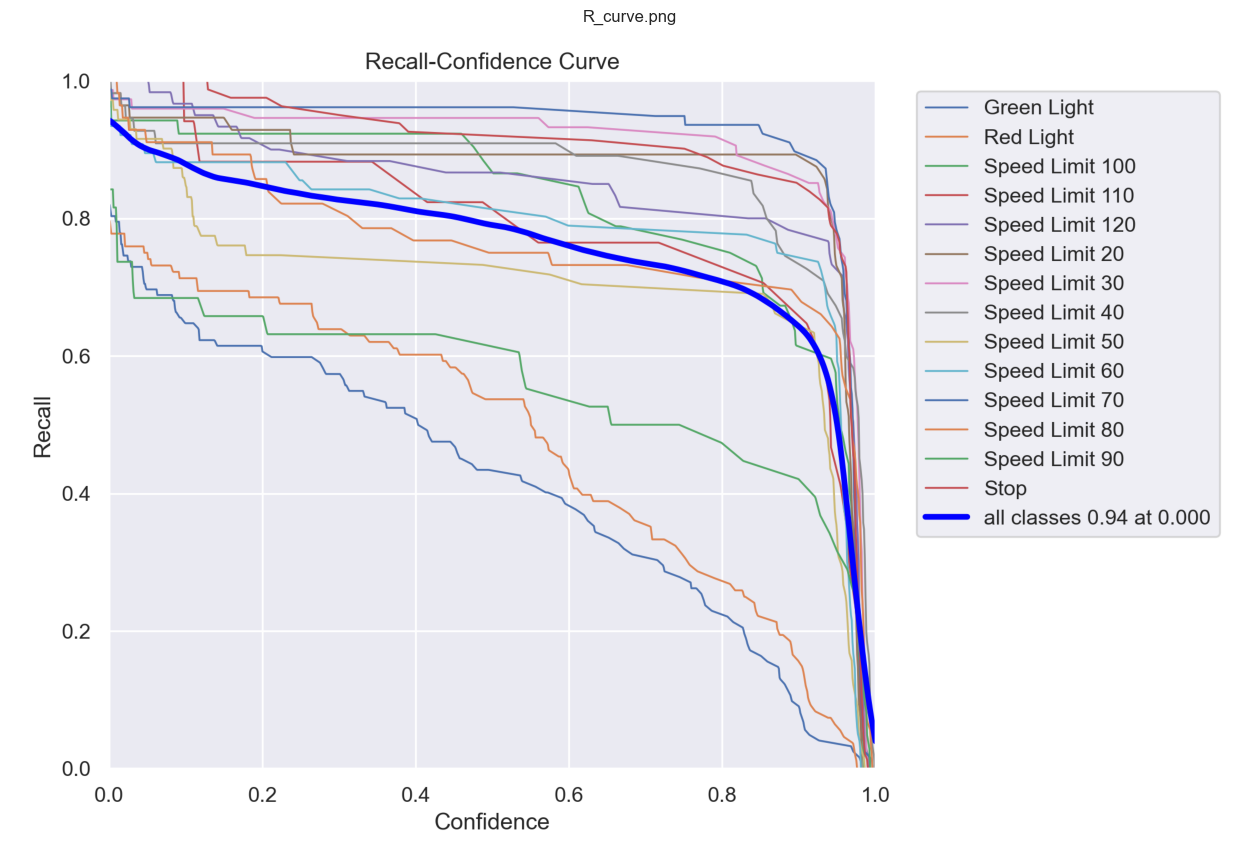

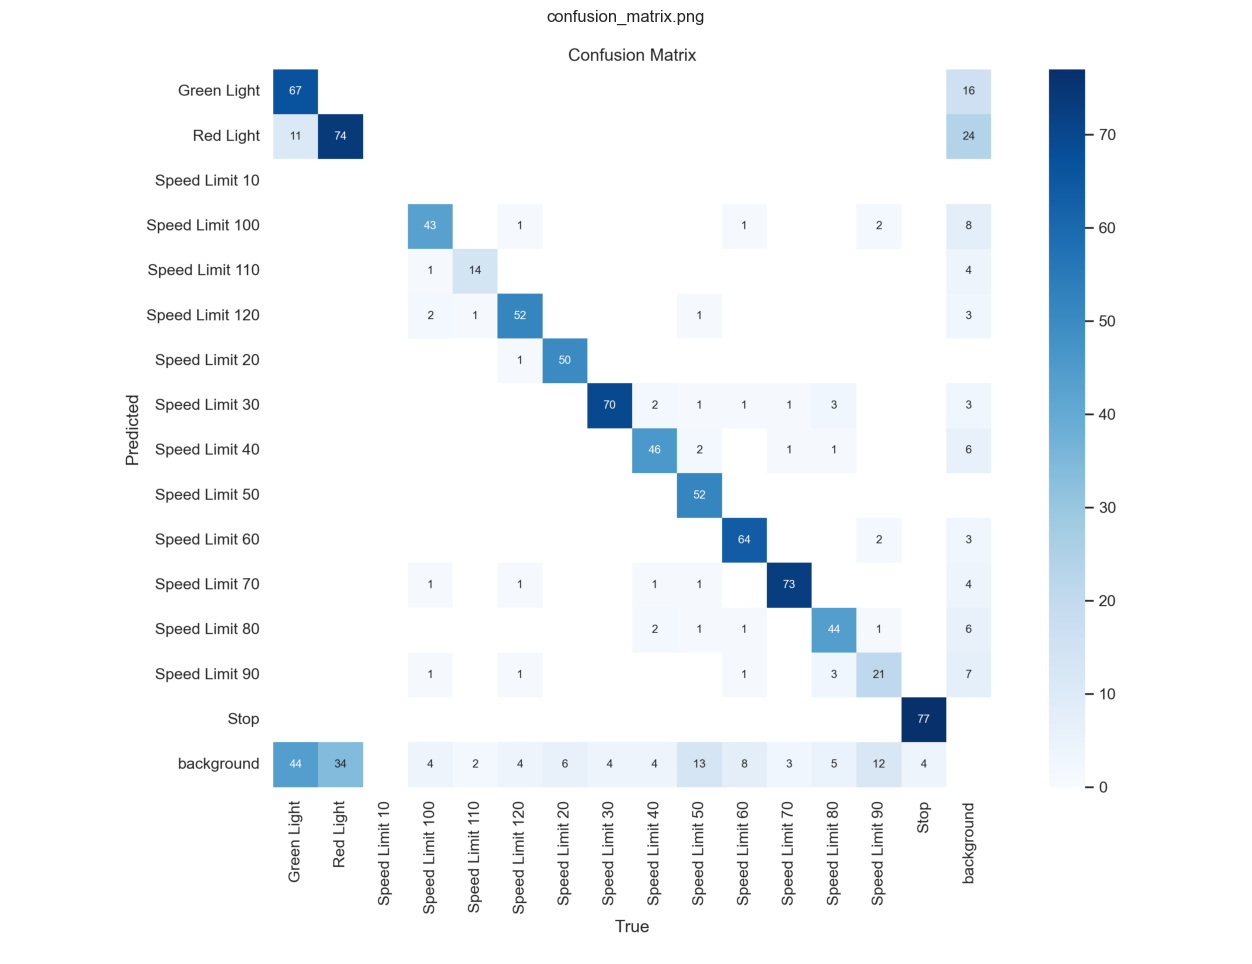

In [10]:
image_dir = "/Users/nivasreddy/Desktop/Final project/archive /runs/detect/train"
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

for image_file in list_of_metrics:
    image_path = os.path.join(image_dir, image_file)
    if os.path.exists(image_path):
        image = cv2.imread(image_path)
        if image is not None:
            plt.figure(figsize=(16, 12))
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
            plt.title(image_file)
            plt.axis('off')  
            plt.show()
        else:
            print(f"Unable to read image file: {image_file}")
    else:
        print(f"Image file not found: {image_file}")


In [12]:
Result_Final = pd.read_csv('/Users/nivasreddy/Desktop/Final project/archive /runs/detect/train/results.csv')
Result_Final.head(5)

epoch        train/box_loss        train/cls_loss  \
0                     1               0.79807                3.5770   
1                     2               0.68804                2.4748   
2                     3               0.68230                2.0402   
3                     4               0.66016                1.6249   
4                     5               0.62732                1.3244   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0               1.05820               0.04094               0.77509   
1               0.95099               0.29858               0.40268   
2               0.94632               0.55805               0.47804   
3               0.93475               0.55894               0.64124   
4               0.91791               0.77769               0.65675   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.18928               0.15945               0.69577   
1               0.33695               0.28256               0.73470   
2               0.50945               0.41881               0.70902   
3               0.63963               0.53486               0.65177   
4               0.76930               0.65300               0.63721   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                3.5300               0.96607              0.000172   
1                2.5922               0.99307              0.000313   
2                2.0647               0.96788              0.000419   
3                1.6004               0.93108              0.000370   
4                1.2704               0.91923              0.000318   

                 lr/pg1                lr/pg2  
0              0.000172              0.000172  
1              0.000313              0.000313  
2              0.000419              0.000419  
3              0.000370              0.000370  
4              0.000318              0.000318

## DISPLAYING TRAINING METRICS AND LOSS

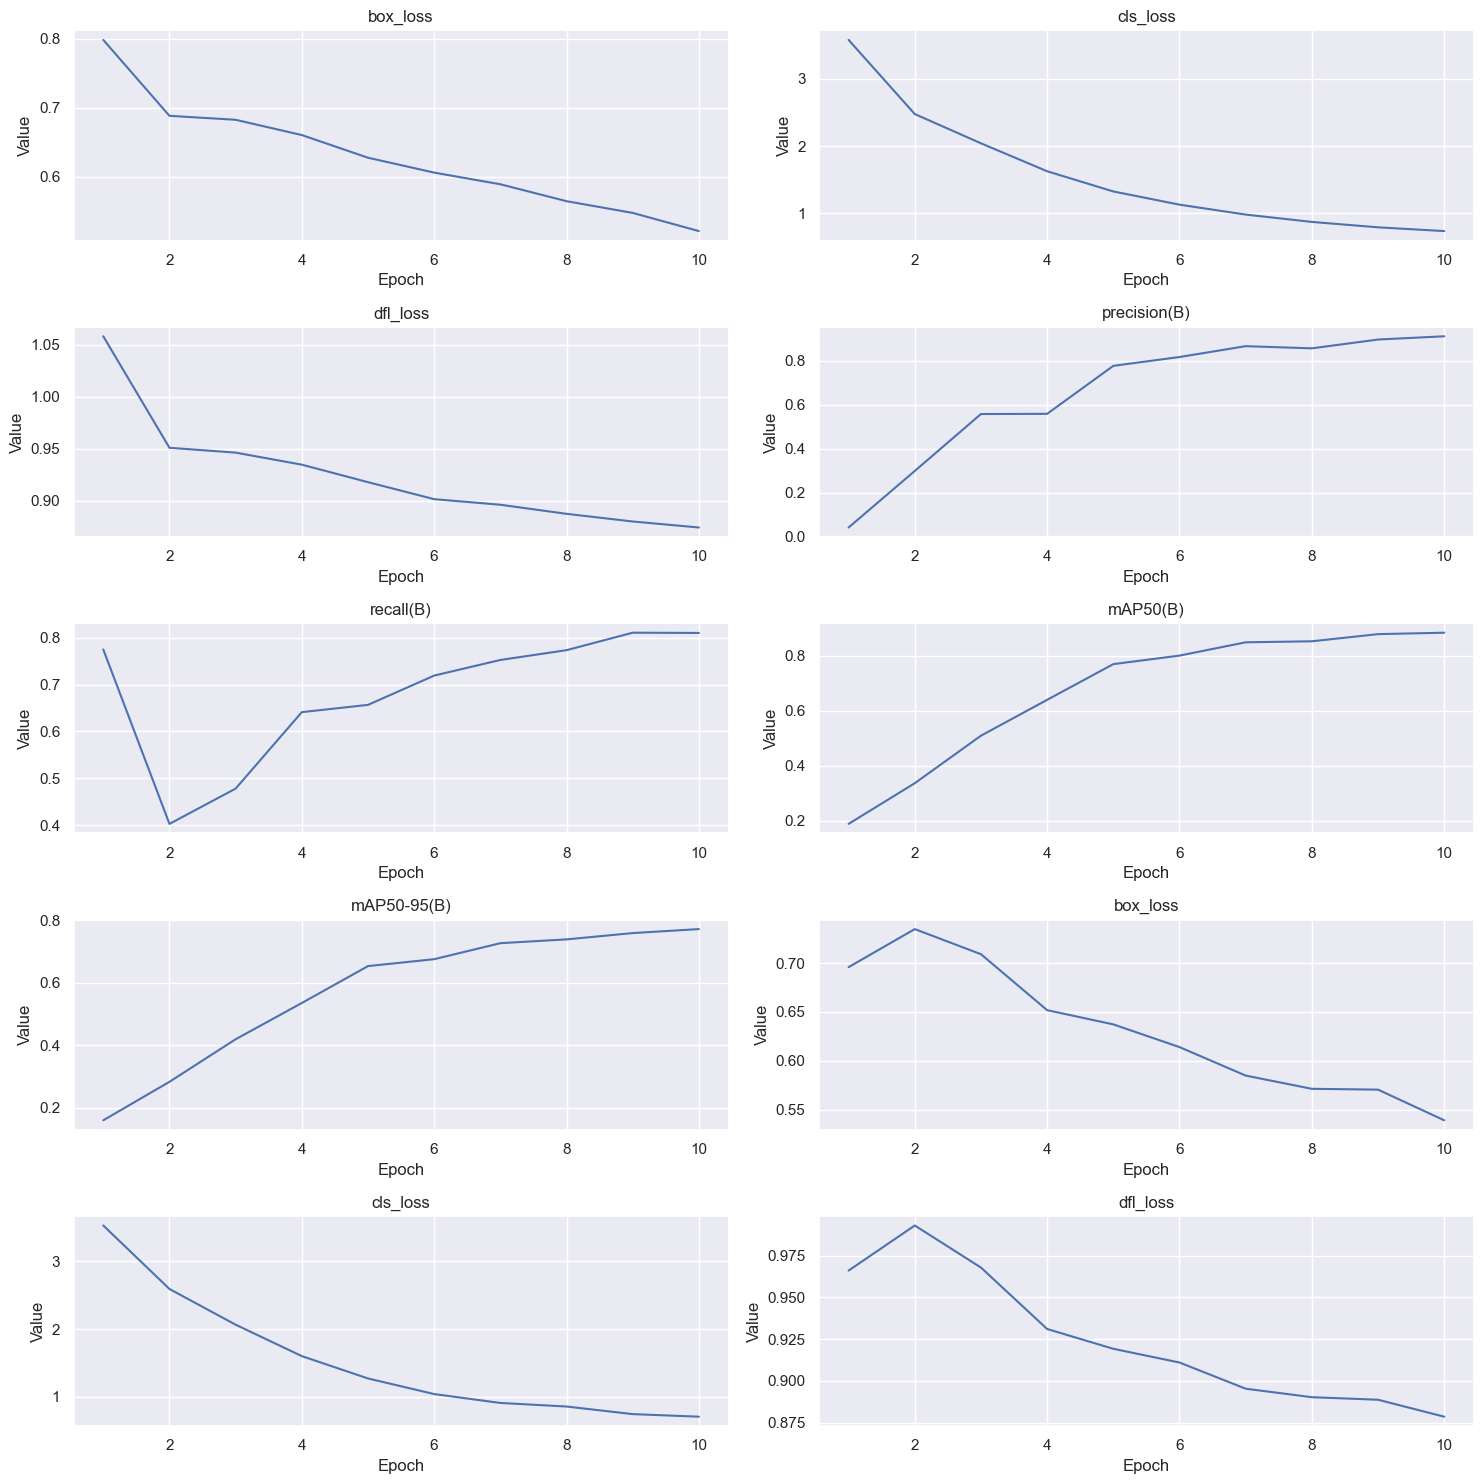

In [25]:
Result_Final.columns = Result_Final.columns.str.strip()
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
for i, metric in enumerate(['train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                            'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
                            'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss']):
    row = i // 2
    col = i % 2
    sns.lineplot(x='epoch', y=metric, data=Result_Final, ax=axs[row, col])
    axs[row, col].set_title(metric.split('/')[1])
    axs[row, col].set_xlabel('Epoch')
    axs[row, col].set_ylabel('Value')

plt.tight_layout()
output_file = 'combined_subplots.png'
plt.savefig(output_file)



## MODEL VALIDATION USING TESTDATASET

In [41]:
# Loading the best performing model
Valid_model = YOLO('/Users/nivasreddy/Desktop/Final project/archive /runs/detect/train/weights/best.pt')
metrics = Valid_model.val(split = 'test')


Ultralytics YOLOv8.2.5 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M1)
YOLOv8 summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/nivasreddy/Desktop/Final project/archive /test/labels.cache... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:58<00:00,  1.47s/it]


                   all        638        770      0.913        0.7      0.823      0.707
           Green Light        638        110      0.908      0.536      0.758      0.438
             Red Light        638         94      0.754      0.543      0.611      0.391
        Speed Limit 10        638          3          1          0      0.466      0.324
       Speed Limit 100        638         46      0.967      0.804      0.887      0.785
       Speed Limit 110        638         21      0.826      0.619      0.763      0.695
       Speed Limit 120        638         44      0.912      0.932      0.951      0.858
        Speed Limit 20        638         46          1      0.845      0.963      0.871
        Speed Limit 30        638         60      0.915      0.783      0.867      0.804
        Speed Limit 40        638         53      0.837      0.887      0.937      0.817
        Speed Limit 50        638         50      0.982       0.74      0.825      0.755
        Speed Limit 6

## PRINTING THE METRICS

In [56]:
from tabulate import tabulate
metrics_keys = ["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
precision, recall, mAP50, mAP50_95 = [round(metrics.results_dict[key] * 100, 2) for key in metrics_keys]

In [57]:
# Manually format the table
print('\033[1mMetrics of Test Data:\033[0m')
print("{:<15} {:>10}".format("Metric", "Value"))
print("-" * 25)
print("{:<15} {:>10}".format("Precision", str(precision) + "%"))
print("{:<15} {:>10}".format("Recall", str(recall) + "%"))
print("{:<15} {:>10}".format("mAP50", str(mAP50) + "%"))
print("{:<15} {:>10}".format("mAP50-95", str(mAP50_95) + "%"))

Metrics of Test Data:
Metric               Value
-------------------------
Precision           91.26%
Recall              69.96%
mAP50                82.3%
mAP50-95            70.72%


## Validating the model with validation data¶

In [66]:
image_dir = '/Users/nivasreddy/Desktop/Final project/archive /valid/images'  
all_files = os.listdir(image_dir)
image_files = [os.path.join(image_dir, file) for file in all_files]
random_image_indices = random.sample(range(len(image_files)), 16)
random_image = [image_files[i] for i in random_image_indices]

for img in random_image:
    image = cv2.imread(img)  
    results = fin_mdl.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)



0: 416x416 1 Speed Limit 100, 69.6ms
Speed: 3.0ms preprocess, 69.6ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 Speed Limit 30, 55.9ms
Speed: 0.7ms preprocess, 55.9ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 2 Red Lights, 53.5ms
Speed: 0.6ms preprocess, 53.5ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Speed Limit 70, 57.7ms
Speed: 0.8ms preprocess, 57.7ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Speed Limit 70, 80.0ms
Speed: 0.5ms preprocess, 80.0ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Speed Limit 100, 49.4ms
Speed: 0.6ms preprocess, 49.4ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to r

## Plotting Images After Detecting the Object¶

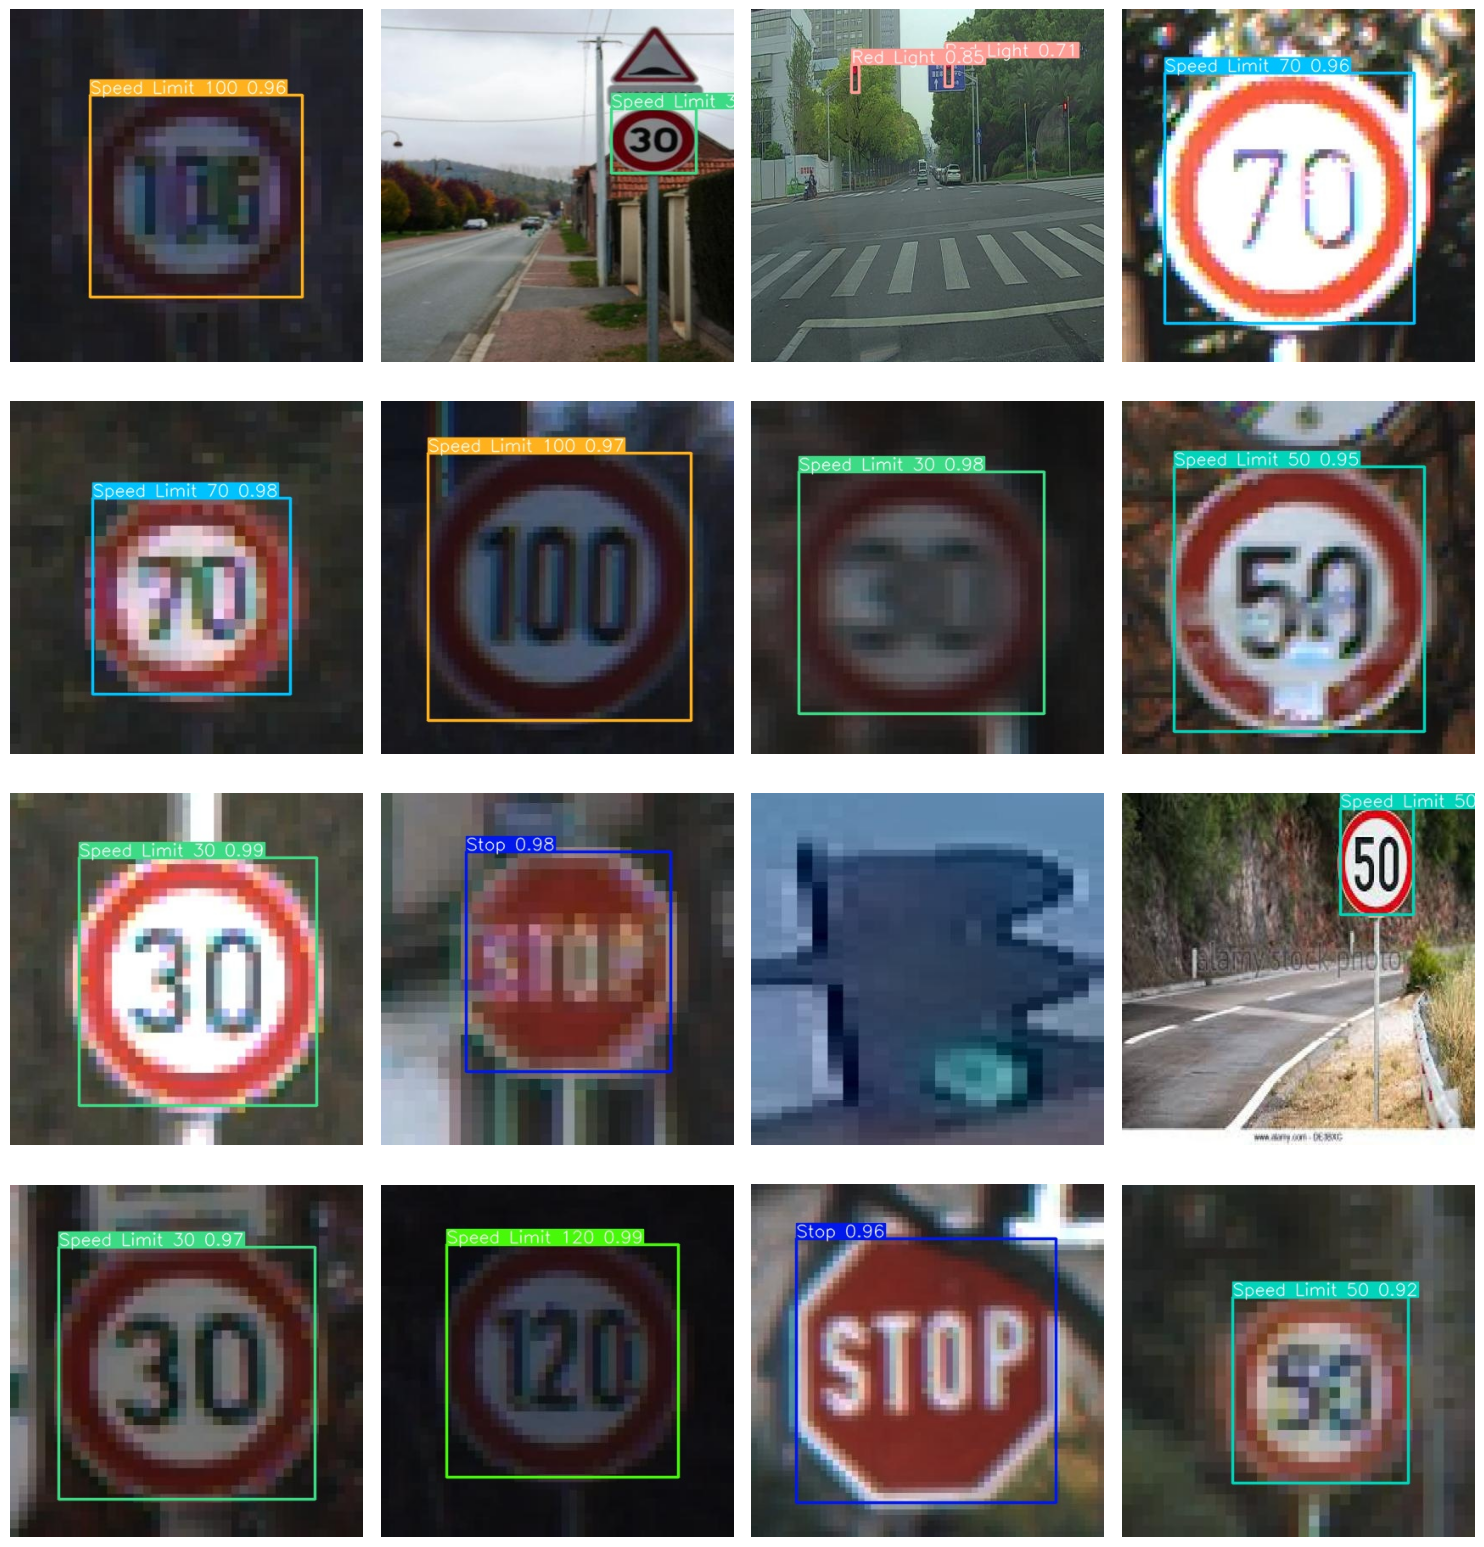

In [67]:
num_images = len(random_image)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols  
plt.figure(figsize=(15, 4 * num_rows)) 

for i in range(2, 18):
    plt.subplot(num_rows, num_cols, i-1)
    img_path = "/Users/nivasreddy/Desktop/Final project/archive /runs/detect/train{i}/image0.jpg".format(i=i)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout() 
plt.show()


## Trying to Detect Traffic Signs From Video using pretrained YOLOV8

In [68]:
pip install onnx


Note: you may need to restart the kernel to use updated packages.


In [69]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model.export(format='onnx')  


Ultralytics YOLOv8.2.5 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M1)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 0.7s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (1.2s)
Results saved to /Users/nivasreddy/Desktop/Final project/archive 
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'

In [71]:
from IPython.display import Video
video_path = "output.mp4"
Video(video_path)


## LOADING PRETRAINED MODEL

In [72]:
video_model = YOLO("yolov8n.pt")
video_model.predict(source="output.mp4", show=True, save = True)

2024-05-14 16:40:20.685 Python[1952:4359642] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /Users/nivasreddy/Desktop/Final project/archive /output.mp4: 640x640 1 stop sign, 142.4ms
video 1/1 (frame 2/508) /Users/nivasreddy/Desktop/Final project/archive /output.mp4: 640x640 1 stop sign, 99.7ms
video 1/1 (frame 3/508) /Users/nivasreddy/Desktop/Final project/archive /output.mp4: 640x640 1 stop sign, 111.8ms
video 1/1 (frame 4/508) /Users/nivasreddy/Desktop/Final project/archive /output.mp4: 640x640 1 traffic light, 85.7m

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

## DISPLAYING THE RESULTING VIDEO

In [73]:
video_path = "/Users/nivasreddy/Desktop/Final project/archive /runs/detect/predict/output.mp4"
Video(video_path)
